$\color{yellow}{\text{Thông tin sinh viên}}$

| **Họ và Tên**            | **MSSV**     |
|:-------------------------|:------------:|
| Ngô Thị Mỹ Duyên         | 22280017     |
| Lê Hoàng Uyên Thư        | 22280090    |


#Chuẩn bị Dữ liệu

## Gom tập dữ liệu và dán nhãn

In [ ]:
import numpy as np
import pandas as pd

DataSet_Misinfo_FAKE = pd.read_csv("DataSet_Misinfo_FAKE.csv")
DataSet_Misinfo_TRUE = pd.read_csv("DataSet_Misinfo_TRUE.csv")

In [ ]:
DataSet_Misinfo_FAKE.head()

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...


In [ ]:
# Loại bỏ cột index
DataSet_Misinfo_FAKE = DataSet_Misinfo_FAKE.iloc[:,1:]
DataSet_Misinfo_TRUE = DataSet_Misinfo_TRUE.iloc[:,1:]

# Gắn nhãn cho 'text' trước khi gộp file
DataSet_Misinfo_FAKE['label'] = 0
DataSet_Misinfo_TRUE['label'] = 1

In [ ]:
DataSet_Misinfo_FAKE.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
DataSet_Misinfo_TRUE.head()

,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1


In [ ]:
# Gộp 2 dataframe thành một
df_combined = pd.concat([DataSet_Misinfo_FAKE, DataSet_Misinfo_TRUE], ignore_index=True)

# Xáo trộn thứ tự dòng
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

In [ ]:
df_combined.head()

,text,label
0,"On Tuesday, a hot mic at a House Republican pr...",0
1,Hillary Clinton’s camp late Sunday issued a si...,1
2,Republican presidential front-runner Donald Tr...,1
3,NATO accused Russia on Thursday of misleading ...,1
4,"SEAFORD, Del. — Sunlight floods the floor a...",1


In [ ]:
# Chuyển datadrame thành file .csv
df_combined.to_csv('DataSet_Misinfo_Combined.csv', index=False)

In [ ]:
# Tạo liên kết để tải xuống file dữ liệu 'combined', dùng cho các lần chạy sau
from IPython.display import FileLink
FileLink('DataSet_Misinfo_Combined.csv')

/content/DataSet_Misinfo_Combined.csv

## Lấy file data đã tổng hợp

In [ ]:
import gdown
import pandas as pd

# Google Drive file ID
file_id = "1WaeZyOUxInG_lhUWYirzEmscwNodU6xi"
url = f"https://drive.google.com/uc?id={file_id}"

# Output file name
output = "DataSet_Misinfo_Combined.csv"

# Tải file
gdown.download(url, output, quiet=False)

# Tạo dataframe
df_combined = pd.read_csv('DataSet_Misinfo_Combined.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1WaeZyOUxInG_lhUWYirzEmscwNodU6xi
From (redirected): https://drive.google.com/uc?id=1WaeZyOUxInG_lhUWYirzEmscwNodU6xi&confirm=t&uuid=bd16402e-566c-41b5-bcbe-2ae15164fb05
To: /content/DataSet_Misinfo_Combined.csv
100%|██████████| 231M/231M [00:02<00:00, 104MB/s]


In [ ]:
df_combined

,text,label
0,"On Tuesday, a hot mic at a House Republican pr...",0
1,Hillary Clinton’s camp late Sunday issued a si...,1
2,Republican presidential front-runner Donald Tr...,1
3,NATO accused Russia on Thursday of misleading ...,1
4,"SEAFORD, Del. — Sunlight floods the floor a...",1
...,...,...
78583,Contaminated food from China now entering the ...,0
78584,While pundits have been busily dissecting exac...,0
78585,U.S. House Speaker Paul Ryan on Tuesday called...,1
78586,Report: Saxophone Still An Okay Vehicle For Se...,0


# Exploratory Data Analysis

🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢 EDA FAKE NEWS DETECTION 🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢

📊 BASIC STATISTICS:
- Total samples: 78588
- Fake news (0): 43642 | True news (1): 34946
- Missing values in 'text': 0
- Duplicated values: 9984


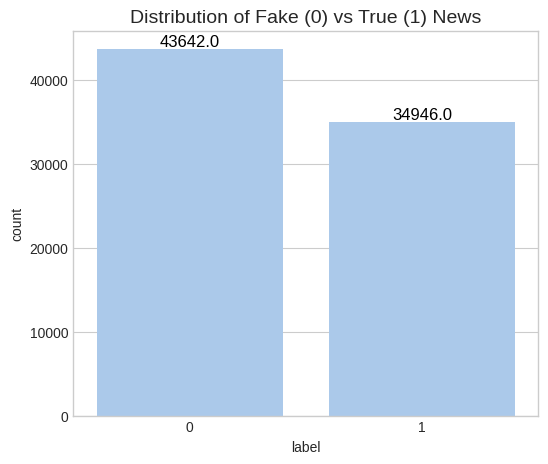


☁️WORD CLOUDS:


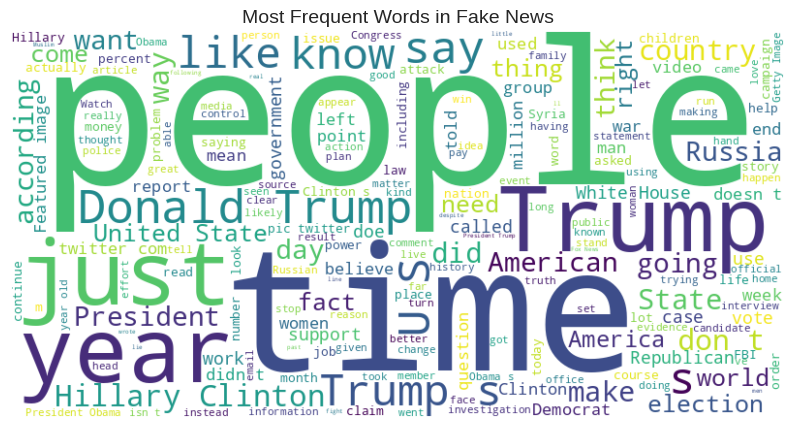

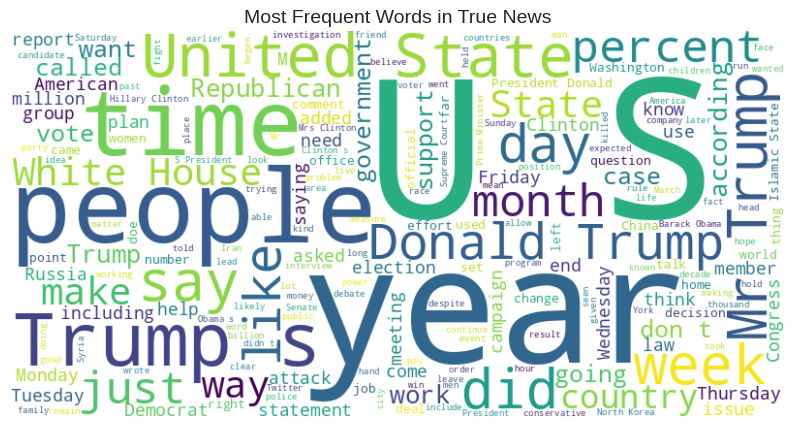




✨TOP BIGRAMS (EXCLUDING STOP WORDS):


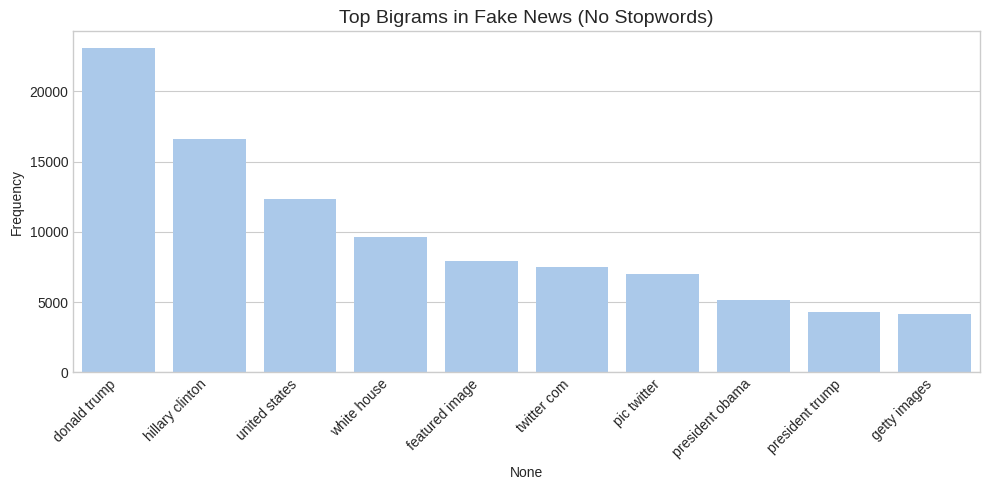

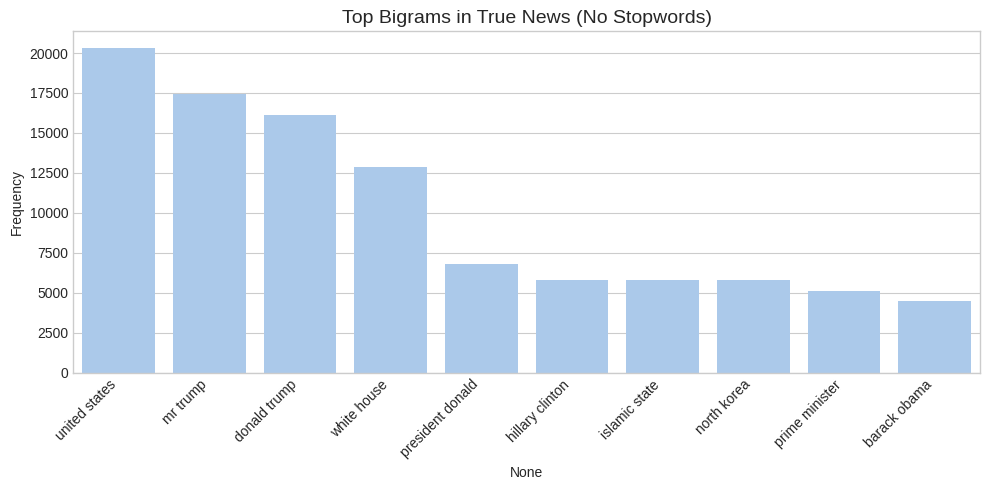


📝 EDA SUMMARY:
- Fake news có độ dài trung bình: 436.4 từ
- True news có độ dài trung bình: 533.6 từ
********************************************************************************


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction import text as sk_text
BLACK     = '\033[30m'
RED       = '\033[31m'
GREEN     = '\033[32m'
YELLOW    = '\033[33m'
BLUE      = '\033[34m'
MAGENTA   = '\033[35m'
CYAN      = '\033[36m'
WHITE     = '\033[37m'
RESET     = '\033[0m'

# Thực hiện EDA
def eda_fake_news(df, text_col='text', label_col='label'):

    # === Thiết lập style ===
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("pastel")
    print("🟢" * 10 + " EDA FAKE NEWS DETECTION " + "🟢" * 10)

    # === Thống kê cơ bản ===
    print(f"\n📊{MAGENTA} BASIC STATISTICS:{RESET}")
    print(f"- Total samples: {len(df)}")
    print(f"- Fake news (0): {len(df[df[label_col]==0])} | True news (1): {len(df[df[label_col]==1])}")
    print(f"- Missing values in '{text_col}': {df[text_col].isnull().sum()}")
    print(f"- Duplicated values: {df.duplicated().sum()}")
    print("=" * 80)

    # === Phân phối nhãn ===
    plt.figure(figsize=(6, 5))
    ax = sns.countplot(data=df, x=label_col)
    plt.title("Distribution of Fake (0) vs True (1) News", fontsize=14)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')
    plt.show()
    print("=" * 80)

    # === WordCloud cho từng nhãn ===
    print(f"\n☁️{MAGENTA}WORD CLOUDS:{RESET}")

    # Thêm stop words
    custom_stop_words = {'said', 'would', 'could', 'also', 'one', 'two', 'new'}
    stop_words = sk_text.ENGLISH_STOP_WORDS.union(custom_stop_words)

    for label in [0, 1]:
        plt.figure(figsize=(10, 6))
        text = ' '.join(df[df[label_col]==label][text_col].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Most Frequent Words in {'Fake' if label == 0 else 'True'} News", fontsize=14)
        plt.axis('off')
        plt.show()
        print("\n")
    print("=" * 80)

    # === Top N-grams ===
    print(f"\n✨{MAGENTA}TOP BIGRAMS (EXCLUDING STOP WORDS):{RESET}")

    stop_words = list(stop_words)

    for label in [0, 1]:
        text_data = df[df[label_col]==label][text_col].astype(str)

        # Sử dụng CountVectorizer với stop_words và ngram_range=(2,2)
        vec = CountVectorizer(
            ngram_range=(2, 2),
            stop_words=stop_words,  # Loại bỏ stop words
            max_features=20
        ).fit(text_data)

        # Tính toán bigrams
        bigrams = pd.DataFrame(
            vec.transform(text_data).sum(axis=0),
            columns=vec.get_feature_names_out()
        ).T.sort_values(0, ascending=False).head(10)

        # Visualize
        plt.figure(figsize=(10, 5))
        sns.barplot(data=bigrams, x=bigrams.index, y=0)
        plt.title(f"Top Bigrams in {'Fake' if label == 0 else 'True'} News (No Stopwords)", fontsize=14)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  # Tránh chồng chéo nhãn
        plt.show()
    print("=" * 80)


    # === Xuất báo cáo tổng hợp ===

    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

    print(f"\n📝 {MAGENTA}EDA SUMMARY:{RESET}")
    print(f"- Fake news có độ dài trung bình: {df[df[label_col]==0]['word_count'].mean():.1f} từ")
    print(f"- True news có độ dài trung bình: {df[df[label_col]==1]['word_count'].mean():.1f} từ")
    print("*" * 80)

# Ví dụ sử dụng:
eda_fake_news(df_combined.copy(), text_col='text', label_col='label')

$\color{orange}{**\text{Observation:}**}$
   - **Tổng số mẫu:** 78,588 dữ liệu tin tức

   - **Phân phối nhãn:** Tin giả (label = 0) 55%, Tin thật (label = 1) 45%
  
     $\rightarrow$ Số lượng tin giả cao hơn so với tin thật. Điều này phù hợp với thực tế trong môi trường mạng, nơi tin giả thường lan truyền nhiều hơn. Tuy nhiên, mức độ lệch không nghiệm trọng, nên tụi em không thực hiện cân bằng để tránh làm giảm tính tự nhiên của dữ liệu.

   - Không có dữ liệu thiếu trong bộ dữ liệu

   - **Dữ liệu trùng lặp:** Có 9984 dòng trùng lặp cần được loại bỏ
   - Từ biểu đồ Word Cloud, có thể thấy rằng các từ phổ biến giữa tin giả và tin thật khá giống nhau, chẳng hạn như: “Trump”, “United States”, “year”, v.v. Điều này cho thấy rằng: **Các tin giả thường khai thác cùng chủ đề, bối cảnh và thực thể nổi bật như các tin thật** -  đặc biệt là những chủ đề được công chúng quan tâm rộng rãi như chính trị, sức khỏe, và sự kiện quốc tế.
    
   - Tin thật có độ dài trung bình cao hơn đáng kể so với tin giả, phản ánh đặc điểm thường thấy: **tin thật chi tiết và có cấu trúc thông tin đầy đủ**, trong khi **tin giả thường ngắn và hướng tới việc tạo ấn tượng nhanh**.

**Sample text của TRUE và FAKE news**

In [ ]:
# === In một câu TRUE vs một câu FAKE news ===
true_text = df_combined['text'].iloc[1]
fake_text = df_combined['text'].iloc[0]

print(f"{BLUE}TRUE NEWS{RESET}\n{true_text}")
print(f"\n\n{RED}FAKE NEWS{RESET}\n{fake_text}")

TRUE NEWS
Hillary Clinton’s camp late Sunday issued a significant clarification about the steps they say were taken to review thousands of personal emails before they were deleted, claiming her team individually read “every email” before discarding those deemed private.

Clinton spokesman Nick Merrill made the clarification in a written statement to Fox News. This comes after the former secretary of state’s office revealed last week that while more than 30,000 “work-related” emails were turned over to the State Department, nearly 32,000 were deemed “private” and deleted.

This admission raised questions over how her team decided to get rid of those messages. Merrill on Sunday clarified an earlier fact sheet that described some of those methods but did not say every email was read.

“We simply took for granted that reading every single email came across as the most important, fundamental and exhaustive step that was performed.  The fact sheet should have been clearer in stating that eve

## Preprocess Data

In [ ]:
# ===== Xử lý dữ liệu cơ bản =====
import pandas as pd
import numpy as np
import re
import random

# ===== Xử lý ngôn ngữ tự nhiên (NLP) =====
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize

# ===== PyTorch và các công cụ hỗ trợ =====
import torch
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader

# ===== Transformers (Hugging Face) =====
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    get_linear_schedule_with_warmup
)

# ===== Keras (dùng cho các mô hình CNN, LSTM, Attention...) =====
from keras.models import Model
from keras.layers import (
    Input, Embedding, Conv1D, MaxPooling1D, LSTM,
    Bidirectional, Dense, Dropout, Attention, concatenate,
    GlobalMaxPooling1D, GlobalAveragePooling1D
)

# ===== TensorFlow Keras (tiền xử lý văn bản) =====
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ===== Capsule Network =====
from capsulelayers import CapsuleLayer, Length

# ===== Tiện ích hỗ trợ =====
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
''' ==================== Data Loading and Preprocessing ==================== '''
def load_and_preprocess_data(df):
    # Load and preprocess the dataset
    df = df.drop_duplicates()  # Remove duplicates

    # Preprocessing
    def preprocess_text(text):
        text = str(text).lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        lemmatizer = nltk.WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)

    df['processed_text'] = df['text'].apply(preprocess_text)
    return df

In [ ]:
# 1. Load và preprocess data
print("Loading and preprocessing data...")
df = load_and_preprocess_data(df_combined.copy())
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Loading and preprocessing data...


In [ ]:
# 2. Chuẩn bị sequence data cho các hybrid models
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['processed_text'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['processed_text']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['processed_text']), maxlen=200)
y_train = train_df['label'].values
y_test = test_df['label'].values

# Model Building

In [ ]:
# Dùng để dịch ngôn ngữ (Google Translate API wrapper)
!pip install googletrans

# Thư viện xử lý văn bản cho Keras
!pip install keras-preprocessing

# Các thư viện cho Capsule Network
!git clone https://github.com/XifengGuo/CapsNet-Keras.git
!cp CapsNet-Keras/capsulelayers.py .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
Cloning into 'CapsNet-Keras'...
remote: Enumerating objects: 235, done.
remote: Total 235 (delta 0), reused 0 (delta 0), pack-reused 235 (from 1)
Receiving objects: 100% (235/235), 1.06 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
"""
(OPTIONAL) Dưới đây thực hiện chỉnh sửa setting của một số hàm/lớp cần thiết cho mô hình Capsule Network
                        (Để tránh lỗi khi không tương thích version)
"""

import keras.backend as K
import tensorflow as tf
from keras import initializers, layers

# Tính độ dài vector (dùng để chuyển vector thành xác suất nhãn dự đoán)
class Length(layers.Layer):
    def call(self, inputs, **kwargs):
        return tf.sqrt(tf.reduce_sum(tf.square(inputs), axis=-1) + tf.keras.backend.epsilon())

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]

    def get_config(self):
        return super(Length, self).get_config()

# Lớp Mask: chỉ giữ lại capsule được chọn (qua argmax hoặc theo nhãn), phần còn lại sẽ bị che (zero out)
class Mask(layers.Layer):
    def call(self, inputs, **kwargs):
        if type(inputs) is list:
            assert len(inputs) == 2
            inputs, mask = inputs
        else:
            x = K.sqrt(K.sum(K.square(inputs), -1))
            mask = K.one_hot(indices=K.argmax(x, 1), num_classes=x.get_shape().as_list()[1])
        masked = K.batch_flatten(inputs * K.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])

    def get_config(self):
        config = super(Mask, self).get_config()
        return config

# Hàm squash: chuẩn hóa vector đầu ra sao cho dài gần 1 nếu lớn, gần 0 nếu nhỏ
def squash(vectors, axis=-1):
    s_squared_norm = tf.reduce_sum(tf.square(vectors), axis=axis, keepdims=True)
    scale = s_squared_norm / (1. + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
    return scale * vectors


# # Capsule Layer: tương tự Dense layer nhưng đầu ra là vector, không phải scalar
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3,
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # Transform matrix
        self.W = self.add_weight(shape=[self.num_capsule, self.input_num_capsule,
                                        self.dim_capsule, self.input_dim_capsule],
                                 initializer=self.kernel_initializer,
                                 name='W')

        self.built = True

    def call(self, inputs, training=None):
        inputs_expand = tf.expand_dims(tf.expand_dims(inputs, 1), -1)
        W_tiled = tf.expand_dims(self.W, 0)

        # Multiply input by W to get u_hat
        inputs_hat = tf.matmul(W_tiled, inputs_expand)
        inputs_hat = tf.squeeze(inputs_hat, axis=-1)

        b = tf.zeros(shape=[tf.shape(inputs_hat)[0], self.num_capsule, self.input_num_capsule])

        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            c = tf.expand_dims(c, -1)
            s = tf.reduce_sum(c * inputs_hat, axis=2)
            outputs = squash(s)

            if i < self.routings - 1:
                outputs_expand = tf.expand_dims(outputs, 2)
                b += tf.reduce_sum(inputs_hat * outputs_expand, axis=-1)

        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])

    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(CapsuleLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


# # Primary Capsule Layer: chuyển feature map từ Conv2D thành các capsule vector đầu tiên
def PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding):
    output = layers.Conv2D(filters=dim_capsule*n_channels, kernel_size=kernel_size, strides=strides, padding=padding,
                           name='primarycap_conv2d')(inputs)
    outputs = layers.Reshape(target_shape=[-1, dim_capsule], name='primarycap_reshape')(output)
    return layers.Lambda(squash, name='primarycap_squash')(outputs)

In [ ]:
# Initialize GPU support
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Transformer Model Definitions

In [ ]:
# ==================== Model Definitions ====================
class TransformerModel:
    """Wrapper cho transformer models với GPU support"""

    def __init__(self, model_name, num_labels=2):
        self.model_name = model_name.lower()

        if "bert" in self.model_name and "roberta" not in self.model_name:
            self.tokenizer = BertTokenizer.from_pretrained(model_name)
            self.model = BertForSequenceClassification.from_pretrained(
                model_name, num_labels=num_labels
            )
        elif "roberta" in self.model_name:
            self.tokenizer = RobertaTokenizer.from_pretrained(model_name)
            self.model = RobertaForSequenceClassification.from_pretrained(
                model_name, num_labels=num_labels
            )
        else:
            raise ValueError(f"Unsupported model name: {model_name}")


    def train(self, train_df, val_df, epochs=3, batch_size=16, adversarial=False):
        self.model.to(device)

        # Sử dụng gradient accumulation để dùng batch_size lớn hơn
        grad_accum_steps = 2  # Tích lũy gradient qua 2 bước

        # Tạo DataLoader với num_workers để tăng tốc độ load dữ liệu
        train_loader = DataLoader(
            TextDataset(train_df['processed_text'], train_df['label'], self.tokenizer, max_len=128),
            batch_size=batch_size,
            shuffle=True,
            num_workers=4,
            pin_memory=True  # Tăng tốc transfer data lên GPU
        )

        val_loader = DataLoader(
            TextDataset(val_df['processed_text'], val_df['label'], self.tokenizer, max_len=128),
            batch_size=batch_size*2,  # Batch size lớn hơn cho validation
            num_workers=4,
            pin_memory=True
        )

        # Sử dụng AdamW với weight decay
        optimizer = AdamW(self.model.parameters(), lr=2e-5, weight_decay=0.01)

        # Mixed precision training
        scaler = torch.cuda.amp.GradScaler()

        for epoch in range(epochs):
            self.model.train()
            total_loss = 0

            for step, batch in enumerate(tqdm(train_loader)):
                input_ids = batch['input_ids'].to(device, non_blocking=True)
                attention_mask = batch['attention_mask'].to(device, non_blocking=True)
                labels = batch['label'].to(device, non_blocking=True)

                with torch.cuda.amp.autocast():  # Mixed precision
                    outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss / grad_accum_steps  # Scale loss

                scaler.scale(loss).backward()

                if (step + 1) % grad_accum_steps == 0:
                    scaler.step(optimizer)
                    scaler.update()
                    optimizer.zero_grad()

                total_loss += loss.item() * grad_accum_steps

    def evaluate(self, data_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in data_loader:
                input_ids = batch['input_ids'].to(device, non_blocking=True)
                attention_mask = batch['attention_mask'].to(device, non_blocking=True)
                labels = batch['label'].to(device, non_blocking=True)

                with torch.inference_mode():
                    outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)

                loss = outputs.loss
                total_loss += loss.item()

                # outputs.logits là tensor đầu ra (logits), chọn class có xác suất cao nhất
                _, predicted = torch.max(outputs.logits, 1)
                total += labels.size(0)  # tổng số mẫu
                correct += (predicted == labels).sum().item()   # đếm số dự đoán đúng

        return correct / total, total_loss / len(data_loader)

    def predict(self, data_loader):
        self.model.eval()
        predictions = []

        with torch.no_grad():
            for batch in data_loader:
                input_ids = batch['input_ids'].to(device, non_blocking=True)
                attention_mask = batch['attention_mask'].to(device, non_blocking=True)

                with torch.inference_mode():
                    outputs = self.model(input_ids, attention_mask=attention_mask)

                # Lấy chỉ số class có xác suất cao nhất
                preds = torch.argmax(outputs.logits, dim=1)
                predictions.append(preds.cpu())  # Giữ trên CPU để tiết kiệm GPU memory

        return torch.cat(predictions).numpy()

In [ ]:
# Fast Gradient Method cho adversarial training
class FGM:
    def __init__(self, model):
        self.model = model
        self.backup = {}

    def attack(self, epsilon=0.5, emb_name='word_embeddings'):
        for name, param in self.model.named_parameters():
            if param.requires_grad and emb_name in name:
                self.backup[name] = param.data.clone()
                norm = torch.norm(param.grad)
                if norm != 0:
                    r_at = epsilon * param.grad / norm
                    param.data.add_(r_at)

    def restore(self, emb_name='word_embeddings'):
        for name, param in self.model.named_parameters():
            if param.requires_grad and emb_name in name:
                assert name in self.backup
                param.data = self.backup[name]
        self.backup = {}

In [ ]:
# Dataset class cho transformer models
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

## Keras Model Definitions

In [ ]:
from keras.layers import Conv1D, Reshape

# Primary Capsule layer using Conv1D for NLP input
def PrimaryCap1D(inputs, dim_capsule, n_channels, kernel_size, strides, padding):
    output = Conv1D(
        filters=dim_capsule * n_channels,
        kernel_size=kernel_size,
        strides=strides,
        padding=padding,
        name='primarycap_conv1d'
    )(inputs)

    outputs = Reshape(target_shape=[-1, dim_capsule], name='primarycap_reshape')(output)
    return outputs

In [ ]:
# ===== Collection of hybrid models with GPU support =====
class HybridModels:
    @staticmethod
    def create_ti_cnn(max_len, vocab_size, embedding_dim=128):
        """Text-Improved CNN"""
        input_layer = Input(shape=(max_len,))
        embedding = Embedding(vocab_size, embedding_dim)(input_layer)

        # Multiple kernel sizes
        conv1 = Conv1D(128, 3, activation='relu', padding='same')(embedding)
        conv2 = Conv1D(128, 4, activation='relu', padding='same')(embedding)
        conv3 = Conv1D(128, 5, activation='relu', padding='same')(embedding)

        pool1 = GlobalMaxPooling1D()(conv1)
        pool2 = GlobalMaxPooling1D()(conv2)
        pool3 = GlobalMaxPooling1D()(conv3)

        merged = concatenate([pool1, pool2, pool3])
        dense1 = Dense(64, activation='relu')(merged)
        output = Dense(1, activation='sigmoid')(dense1)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
        return model

    @staticmethod
    def create_capsule_network(max_len, vocab_size, embedding_dim=128):
        """Capsule Network"""
        input_layer = Input(shape=(max_len,))
        embedding = Embedding(vocab_size, embedding_dim)(input_layer)

        conv1 = Conv1D(128, 5, activation='relu')(embedding)
        primary_caps = PrimaryCap1D(conv1, dim_capsule=8, n_channels=32, kernel_size=3, strides=1, padding='valid')


        digit_caps = CapsuleLayer(num_capsule=2, dim_capsule=16, routings=3)(primary_caps)
        output = Length()(digit_caps)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
        return model

    @staticmethod
    def create_attention_lstm(max_len, vocab_size, embedding_dim=128):
        """Bi-LSTM with Attention"""
        input_layer = Input(shape=(max_len,))
        embedding = Embedding(vocab_size, embedding_dim)(input_layer)

        lstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)
        attention = Attention()([lstm, lstm])
        attention = GlobalAveragePooling1D()(attention)

        dense1 = Dense(64, activation='relu')(attention)
        output = Dense(1, activation='sigmoid')(dense1)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
        return model

# Model Training

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import time

# 1. Định nghĩa các mô hình
models = {
    "BERT (Adversarial)": TransformerModel('bert-base-uncased'),
    "RoBERTa": TransformerModel('roberta-base'),
    "TI-CNN": HybridModels.create_ti_cnn(200, 10000),
    "Capsule Network": HybridModels.create_capsule_network(200, 10000),
    "Bi-LSTM with Attention": HybridModels.create_attention_lstm(200, 10000)
}

results = []

trained_models = {}
# 2. Huấn luyện và đánh giá
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    start_time = time.time()

    if isinstance(model, TransformerModel):
        # Xử lý transformer models
        adversarial = "Adversarial" in name
        model.train(train_df, test_df, epochs=3, adversarial=adversarial)

        loader = DataLoader(
            TextDataset(test_df['processed_text'],
                      test_df['label'],
                      model.tokenizer,
                      max_len=128),
            batch_size=32
        )

        acc, _ = model.evaluate(loader)
        y_pred = model.predict(loader)
        y_true = test_df['label'].values

    else:
        # Xử lý Keras models
        if name == "Capsule Network":
            # Capsule cần one-hot labels
            y_train_cat = to_categorical(y_train, num_classes=2)
            y_test_cat = to_categorical(y_test, num_classes=2)

            model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=10,
                    batch_size=32)

            _, acc = model.evaluate(X_test, y_test_cat)
            y_pred = np.argmax(model.predict(X_test), axis=1)
        else:
            # Các model khác dùng nhãn binary
            model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

            _, acc = model.evaluate(X_test, y_test)
            y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

        y_true = y_test

    end_time = time.time()
    training_time = end_time - start_time

    # 3. Tính metrics
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    results.append([name, acc, precision, recall, f1, training_time])
    trained_models[name] = model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/2503761881.py:48: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()



=== Training BERT (Adversarial) ===


  0%|          | 0/3431 [00:00<?, ?it/s]/tmp/ipykernel_35/2503761881.py:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision
100%|██████████| 3431/3431 [06:15<00:00,  9.14it/s]
/tmp/ipykernel_35/2503761881.py:48: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()



=== Training RoBERTa ===


  0%|          | 0/3431 [00:00<?, ?it/s]/tmp/ipykernel_35/2503761881.py:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision
100%|██████████| 3431/3431 [06:25<00:00,  8.91it/s]



=== Training TI-CNN ===
Epoch 1/10


I0000 00:00:1750334534.898252     146 service.cc:148] XLA service 0x7edd64003040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750334534.898852     146 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750334534.898871     146 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750334535.258446     146 cuda_dnn.cc:529] Loaded cuDNN version 90300


  32/1716 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5748 - loss: 0.6786

I0000 00:00:1750334537.506920     146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1716/1716 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8767 - loss: 0.2709 - val_accuracy: 0.9501 - val_loss: 0.1307
Epoch 2/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9788 - loss: 0.0605 - val_accuracy: 0.9355 - val_loss: 0.1882
Epoch 3/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9277 - val_loss: 0.3040
Epoch 4/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9503 - val_loss: 0.2117
Epoch 5/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.9457 - val_loss: 0.2552
Epoch 6/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9976 - loss: 0.0070 - val_accuracy: 0.9478 - val_loss: 0.2570
Epoch 7/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9982 - loss: 0.0057 - val_accuracy: 0.9491 - val_loss: 0.2733
Epoch 8/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9976 - loss: 0.0069 - val

# Performance Evaluation

In [ ]:
# Hiển thị bảng kết quả
print(f"\n\t\t========={GREEN} MODEL PERFORMANCE COMPARISON{RESET} =========")
print(tabulate(results, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Train Time (s)"], floatfmt=".4f"))


		========= MODEL PERFORMANCE COMPARISON =========
Model                     Accuracy    Precision    Recall    F1-Score    Train Time (s)
----------------------  ----------  -----------  --------  ----------  ----------------
BERT (Adversarial)          0.9749       0.9709    0.9792      0.9750         1447.4468
RoBERTa                     0.9746       0.9778    0.9715      0.9746         1406.4735
TI-CNN                      0.9468       0.9605    0.9323      0.9462          108.1597
Capsule Network             0.9279       0.9350    0.9202      0.9276          211.7635
Bi-LSTM with Attention      0.9383       0.9486    0.9273      0.9378          329.3112


# Visualization

/tmp/ipython-input-4-2505059626.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Model", y="Accuracy", data=df_results, palette="viridis")


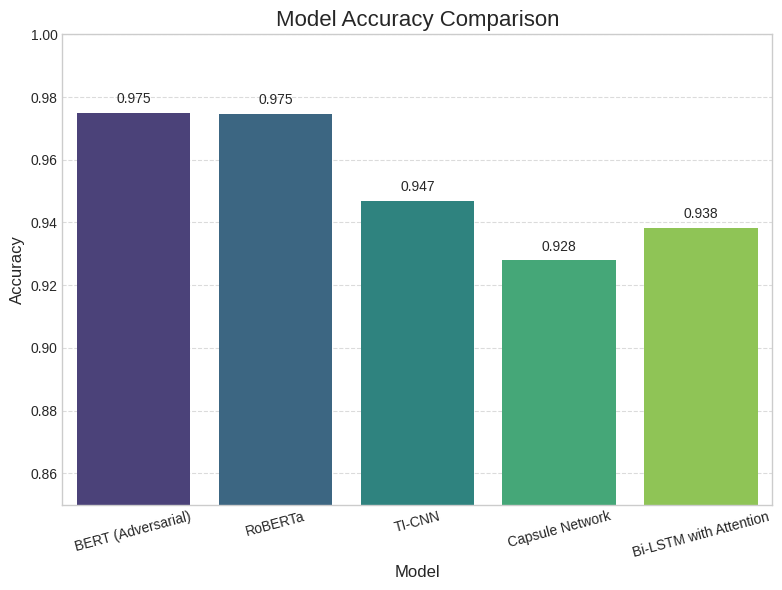

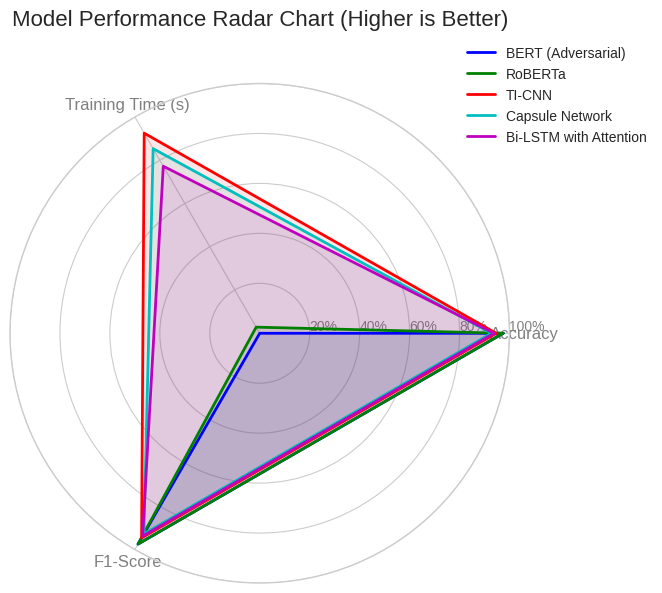

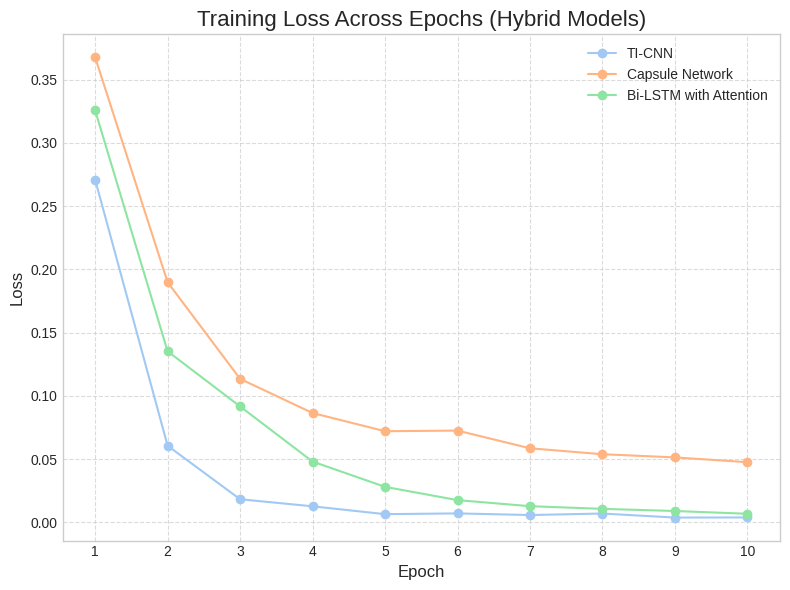

In [ ]:
from matplotlib.ticker import PercentFormatter

results = {
    "BERT (Adversarial)": 0.9749,
    "RoBERTa": 0.9746,
    "TI-CNN": 0.9468,
    "Capsule Network": 0.9279,
    "Bi-LSTM with Attention": 0.9383
}

# Thêm thông tin về loss và thời gian training để minh họa
training_metrics = {
    "Model": list(results.keys()),
    "Accuracy": list(results.values()),
    "F1-Score": [0.9750, 0.9746, 0.9462, 0.9276, 0.9378],
    "Training Time (s)": [1447.4468, 1406.4735, 108.1597, 211.7635, 329.3112]
}

df_results = pd.DataFrame(training_metrics)

''' ===== Biểu đồ cột so sánh accuracy ===== '''
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x="Model", y="Accuracy", data=df_results, palette="viridis")

# Thêm giá trị trên mỗi cột
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.3f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points',
                   fontsize=10)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\n")


''' ===== Biểu đồ radar (spider chart) để so sánh nhiều chỉ số ===== '''
categories = ['Accuracy', 'Training Time (s)', 'F1-Score']
N = len(categories)

# Chuẩn hóa dữ liệu (vì các thang đo khác nhau)
df_normalized = df_results.copy()
df_normalized['Accuracy'] = df_results['Accuracy'] * 100  # Chuyển thành %
df_normalized['F1-Score'] = df_results['F1-Score'] * 100  # Chuyển thành %
df_normalized['Training Time (s)'] = 100 - (df_results['Training Time (s)'] / df_results['Training Time (s)'].max() * 100)  # Thời gian càng thấp càng tốt

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80, 100], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=10)
plt.ylim(0, 100)

colors = ['b', 'g', 'r', 'c', 'm']
for idx, model in enumerate(df_results['Model']):
    values = df_normalized.iloc[idx][['Accuracy', 'Training Time (s)', 'F1-Score']].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[idx], linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, color=colors[idx], alpha=0.1)

plt.title("Model Performance Radar Chart (Higher is Better)", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
print("\n")


''' ===== Biểu đồ line chart quá trình training loss ===== '''
plt.figure(figsize=(8, 6))

epochs = list(range(1, 11))
models = ["TI-CNN", "Capsule Network", "Bi-LSTM with Attention"]

# Loss cho từng model qua 3 epoch
loss_dict = {
    "TI-CNN": [0.2709, 0.0605, 0.0182, 0.0126, 0.0064, 0.0070, 0.0057, 0.0069, 0.0037, 0.0038],
    "Capsule Network": [0.3677, 0.1898, 0.1134, 0.0864, 0.0720, 0.0725, 0.0585, 0.0538, 0.0513, 0.0475],
    "Bi-LSTM with Attention": [0.3257, 0.1352, 0.0916, 0.0480, 0.0280, 0.0175, 0.0127, 0.0106, 0.0089, 0.0067]
}

for model in models:
    plt.plot(epochs, loss_dict[model], marker='o', label=model)

plt.title("Training Loss Across Epochs (Hybrid Models)", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

 - **Hiệu năng tốt:**

  - **BERT (Adversarial)** đạt F1-score cao nhất (0.9750) và Recall cao nhất (0.9792), cho thấy khả năng phát hiện đúng cả hai loại tin tức, đặc biệt là tin thật (label = 1).

  - **RoBERTa** cũng có hiệu năng rất cao, dẫn đầu về Precision (0.9778), cho thấy mô hình ít dự đoán nhầm tin giả thành thật hơn.
  
- **Cân bằng giữa hiệu năng và tốc độ:**

 - **TI-CNN** cho kết quả khá tốt (F1 = 0.9462) trong khi thời gian huấn luyện chỉ khoảng 108s cho 10 epochs. Đây là một lựa chọn phù hợp nếu tài nguyên hạn chế hoặc cần huấn luyện mô hình nhiều lần

- **Hiệu năng thấp:**
 - **Capsule Network** và **Bi-LSTM with Attention** có kết quả thấp hơn đáng kể so với các mô hình transformer, với F1-score dưới 0.94.

# Demo dự đoán tin thật/giả từ các mô hình

In [ ]:
from transformers import pipeline
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 5 mẫu văn bản
sample_texts = [
    "The U.S. House of Representatives passed a bipartisan infrastructure bill, allocating over 1 trillion dollars to invest in public transportation",  # TRUE
    "A leaked CDC report reveals that COVID-19 vaccines contain microchips designed to track American citizens through 5G towers",  # FAKE
    "NASA reports that Arctic sea ice levels have hit a new record low for the third consecutive year, emphasizing the urgency of climate action",  # TRUE
    "Apple secretly installs spyware on all iPhones to record private conversations. A hacker group leaked internal documents proving this",  # FAKE
    "The Biden administration announced a plan to phase out gasoline-powered vehicles by 2035, offering tax incentives for electric car purchases"  # TRUE
]

# ===== HUGGINGFACE MODELS =====

def predict_transformer(name, model, tokenizer):
    print(f"\n=== {name} ===")
    pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)
    label_map = {
        "LABEL_0": "FAKE",
        "LABEL_1": "TRUE"
    }
    results = pipe(sample_texts)
    for i, r in enumerate(results):
        readable_label = label_map.get(r['label'], r['label'])  # fallback nếu label khác thường
        print(f"Sample {i+1}: {sample_texts[i]}\n  → Prediction: {readable_label} (score={r['score']:.2f})\n")

# ===== KERAS MODELS =====

def predict_keras(name, model, tokenizer):
    print(f"\n=== {name} ===")
    sequences = tokenizer.texts_to_sequences(sample_texts)
    padded = pad_sequences(sequences, maxlen=200)

    preds = model.predict(padded)
    # Nếu output là 1 chiều sigmoid
    if preds.shape[1] == 1:
        labels = (preds > 0.5).astype(int).flatten()
    else:
        labels = np.argmax(preds, axis=1)

    for i, label in enumerate(labels):
        pred_label = "TRUE" if label == 1 else "FAKE"
        print(f"Sample {i+1}: {sample_texts[i]}\n  → Prediction: {pred_label}\n")

# ===== GỌI DỰ ĐOÁN =====

# HuggingFace
predict_transformer("BERT (Adversarial)", trained_models["BERT (Adversarial)"].model, trained_models["BERT (Adversarial)"].tokenizer)
predict_transformer("RoBERTa", trained_models["RoBERTa"].model, trained_models["RoBERTa"].tokenizer)

# Keras
predict_keras("TI-CNN", trained_models["TI-CNN"], tokenizer)
predict_keras("Capsule Network", trained_models["Capsule Network"], tokenizer)
predict_keras("Bi-LSTM with Attention", trained_models["Bi-LSTM with Attention"], tokenizer)

Device set to use cuda:0
Device set to use cuda:0



=== BERT (Adversarial) ===
Sample 1: The U.S. House of Representatives passed a bipartisan infrastructure bill, allocating over 1 trillion dollars to invest in public transportation
  → Prediction: TRUE (score=0.95)

Sample 2: A leaked CDC report reveals that COVID-19 vaccines contain microchips designed to track American citizens through 5G towers
  → Prediction: FAKE (score=0.99)

Sample 3: NASA reports that Arctic sea ice levels have hit a new record low for the third consecutive year, emphasizing the urgency of climate action
  → Prediction: TRUE (score=0.54)

Sample 4: Apple secretly installs spyware on all iPhones to record private conversations. A hacker group leaked internal documents proving this
  → Prediction: FAKE (score=0.96)

Sample 5: The Biden administration announced a plan to phase out gasoline-powered vehicles by 2035, offering tax incentives for electric car purchases
  → Prediction: TRUE (score=0.96)


=== RoBERTa ===
Sample 1: The U.S. House of Representatives pa

# Kết luận

Trong bài toán phân loại tin tức thật và giả, năm mô hình được so sánh gồm **BERT (Adversarial), RoBERTa, TI-CNN, Capsule Network và Bi-LSTM with Attention** cho thấy sự khác biệt rõ rệt về hiệu suất và khả năng tổng quát hóa:

- **BERT** và **RoBERTa** đạt kết quả cao nhất với **F1-score gần 0.975**, nhờ vào khả năng hiểu ngữ nghĩa sâu và kiến thức ngôn ngữ tích lũy từ giai đoạn tiền huấn luyện, đồng thời giữ được hiệu quả ổn định khi áp dụng trên dữ liệu ngoài thực tế.

- **Bi-LSTM with Attention** tuy không có pretraining nhưng vẫn đạt `F1-score = 0.9378`, cao hơn **Capsule Network** và **tiệm cận TI-CNN**, cho thấy đây là mô hình có khả năng học ngữ cảnh hai chiều và tập trung vào các phần quan trọng trong văn bản thông qua cơ chế **attention**, rất phù hợp khi muốn cân bằng giữa độ chính xác và chi phí tính toán.

- Trong khi đó, dù **TI-CNN và Capsule Network** thể hiện tốt trên tập test ban đầu, hai mô hình này lại không duy trì được hiệu suất khi thử nghiệm với dữ liệu mới. Nguyên nhân chính đến từ việc không dùng embedding tiền huấn luyện, thiếu khả năng hiểu ngữ nghĩa sâu, và dễ bị **overfit do dữ liệu không đủ đa dạng**.

- Do đó, với bài toán phân loại tin tức trong môi trường thực tế, các **mô hình Transformer** như **BERT và RoBERTa** là lựa chọn tối ưu, trong khi **Bi-LSTM with Attention** là một phương án đáng cân nhắc nếu giới hạn về tài nguyên